#Assignment is submitted at the end of the Notebook
##Assignment: Facial Gender Transformation using GANs

##Objective:
This project explores how the latent space of a pre-trained Generative Adversarial Network (GAN) can be manipulated to control semantic attributes—in this case, gender. The aim was to generate a sequence of 10 images demonstrating a smooth transition from a masculine-presenting face to a feminine-presenting one.

In [1]:
!git clone https://github.com/AshishJangra27/Face-Generator-with-GAN

Cloning into 'Face-Generator-with-GAN'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 34 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 160.27 MiB | 17.25 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Updating files: 100% (10/10), done.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
generator = tf.keras.models.load_model('/content/Face-Generator-with-GAN/generator_700.h5', compile=False)

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

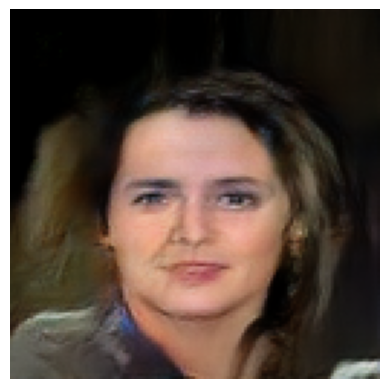

In [3]:
noise = tf.random.normal([1, 100])
# noise += .5

with tf.device('/CPU:0'):
    generated_images = generator(noise, training=False)

generated_images = (generated_images + 1) / 2.0

plt.imshow(generated_images[0])
plt.axis('off')

In [4]:
def generate_variations(model, noise_dim=100, num_variations=10):
    base_noise = tf.random.normal([1, noise_dim])
    noise_modifications = np.linspace(-2, 2, num_variations)
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns

    for i, noise_offset in enumerate(noise_modifications):
        variation_noise = base_noise + noise_offset

        with tf.device('/CPU:0'):
            generated_image = model(variation_noise, training=False)

        generated_image = (generated_image + 1) / 2.0

        ax = axes[i // 5, i % 5]
        ax.imshow(generated_image[0])
        ax.axis('off')
        ax.set_title(f"Noise {noise_offset:.1f}")

    plt.tight_layout()
    plt.show()

# Generate and display variations
generate_variations(generator)

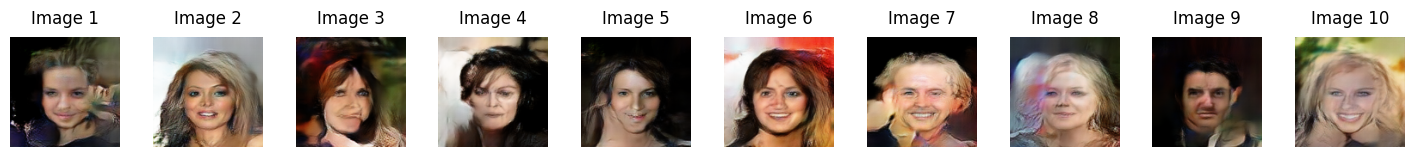

In [5]:
def generate_images_grid(model, noise_dim=100, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(18, 5))  # Wider figure

    for i in range(num_images):
        noise = tf.random.normal([1, noise_dim])

        with tf.device('/CPU:0'):
            generated_image = model(noise, training=False)
        generated_image = (generated_image + 1) / 2.0

        axes[i].imshow(generated_image[0])
        axes[i].axis('off')
        axes[i].set_title(f"Image {i+1}", fontsize=12, pad=10)

    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Generate and display 10 images in a spaced 1x10 layout
generate_images_grid(generator)


In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# Force CPU execution
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Function to generate images with and without added noise
def generate_images_with_manipulated_noise(model, noise_dim=100, num_images=10):
    # Generate base random noise vectors
    base_noise = tf.random.normal([num_images, noise_dim])

    # Generate a random noise vector to add to all base noise vectors
    added_noise = tf.random.normal([1, noise_dim]) * 0.5  # Scaling factor for subtle manipulation

    fig, axes = plt.subplots(2, num_images, figsize=(30, 10))  # 2 rows, num_images columns

    for i in range(num_images):
        noise = base_noise[i:i+1]  # Extract a single noise vector
        manipulated_noise = noise + added_noise  # Add the same noise to all vectors

        # Generate original image
        with tf.device('/CPU:0'):
            original_image = model(noise, training=False)
            manipulated_image = model(manipulated_noise, training=False)

        # Rescale images from [-1,1] to [0,1]
        original_image = (original_image + 1) / 2.0
        manipulated_image = (manipulated_image + 1) / 2.0

        # Display manipulated image (Top row)
        axes[0, i].imshow(manipulated_image[0])
        axes[0, i].axis('off')
        axes[0, i].set_title(f"Manipulated {i+1}", fontsize=12, pad=10)

        # Display original image (Bottom row)
        axes[1, i].imshow(original_image[0])
        axes[1, i].axis('off')
        axes[1, i].set_title(f"Original {i+1}", fontsize=12, pad=10)

    plt.tight_layout()
    plt.show()
# generate and display manipulated vs. original images
generate_images_with_manipulated_noise(generator)

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# Force CPU execution
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Function to generate 6x10 variations of the same base image with nonlinear noise changes
def generate_nonlinear_variations(model, noise_dim=100, rows=6, cols=10):
    base_noise = tf.random.normal([1, noise_dim])  # Base noise

    # Create nonlinear variations of noise
    noise_modifications = np.linspace(-2, 2, rows * cols) * 0.35  # Base values
    sinusoidal_variations = np.sin(noise_modifications) * 0.35    # Sinusoidal variation
    exponential_variations = (np.exp(noise_modifications / 2) - 1) * 0.35  # Exponential variation
    combined_variations = noise_modifications + sinusoidal_variations + exponential_variations  # Mix variations

    fig, axes = plt.subplots(rows, cols, figsize=(30, 18))  # 6 rows, 10 columns

    for i, noise_offset in enumerate(combined_variations):
        variation_noise = base_noise + (noise_offset * tf.random.normal([1, noise_dim]))  # Apply variation in different directions

        with tf.device('/CPU:0'):
            generated_image = model(variation_noise, training=False)
        generated_image = (generated_image + 1) / 2.0  # Rescale for visualization

        ax = axes[i // cols, i % cols]
        ax.imshow(generated_image[0])
        ax.axis('off')
        ax.set_title(f"Variation {i+1}", fontsize=10)

    plt.tight_layout()
    plt.show()

# Generate and display nonlinear variations
generate_nonlinear_variations(generator)

Output hidden; open in https://colab.research.google.com to view.

In [8]:
noise = tf.random.normal([1, 100])
# noise += .5

with tf.device('/CPU:0'):
    generated_images = generator(noise, training=False)

generated_images = (generated_images + 1) / 2.0

plt.imshow(generated_images[0])
plt.axis('off')

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

In [9]:
!git clone https://github.com/AshishJangra27/Face-Generator-with-GAN

fatal: destination path 'Face-Generator-with-GAN' already exists and is not an empty directory.


In [10]:
import numpy as np
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt

import imageio
from tqdm import tqdm


os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

generator = tf.keras.models.load_model('/content/Face-Generator-with-GAN/generator_700.h5', compile=False)

1. Generate Images

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

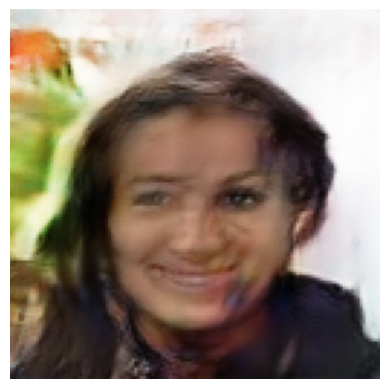

In [11]:
noise = tf.random.normal([1, 100])

with tf.device('/CPU:0'):
    generated_images = generator(noise, training=False)

generated_images = (generated_images + 1) / 2.0

plt.imshow(generated_images[0])
plt.axis('off')

2. Bulk Generation

In [12]:
def generate_multiple_images(model, noise_dim=100, num_images=10):
    fig, axes = plt.subplots(2, 5, figsize=(15, 7))  # 10 rows, 5 columns

    for i in range(num_images):
        noise = tf.random.normal([1, noise_dim])  # Generate random noise

        with tf.device('/CPU:0'):
            generated_image = model(noise, training=False)

        generated_image = (generated_image + 1) / 2.0  # Rescale for visualization

        # Plot the generated image
        ax = axes[i // 5, i % 5]  # Row-wise placement
        ax.imshow(generated_image[0])
        ax.axis('off')
        ax.set_title(f"Image {i+1}", fontsize=12, pad=10)

    plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjust spacing between images
    plt.show()

generate_multiple_images(generator)

3. Getting Classification on Faces

In [13]:
import kagglehub

# Download latest version
path = kagglehub.model_download("ashishjangra27/gender-classifier-mobilenet/keras/gender-classifier-mobilenet")

print("Path to model files:", path)

Path to model files: /kaggle/input/gender-classifier-mobilenet/keras/gender-classifier-mobilenet/1


##**Assignment:**

##1. Load the pretrainde Generator

##2. Load Gender Vector

##3. Generate 10 variations of the image from male to female as per gender vector

Generator model loaded successfully.
Model expects input shape: (None, 100)
Gender vector loaded and reshaped successfully.

 Generating 10 image variations...
 Generation complete.

 Displaying the results...


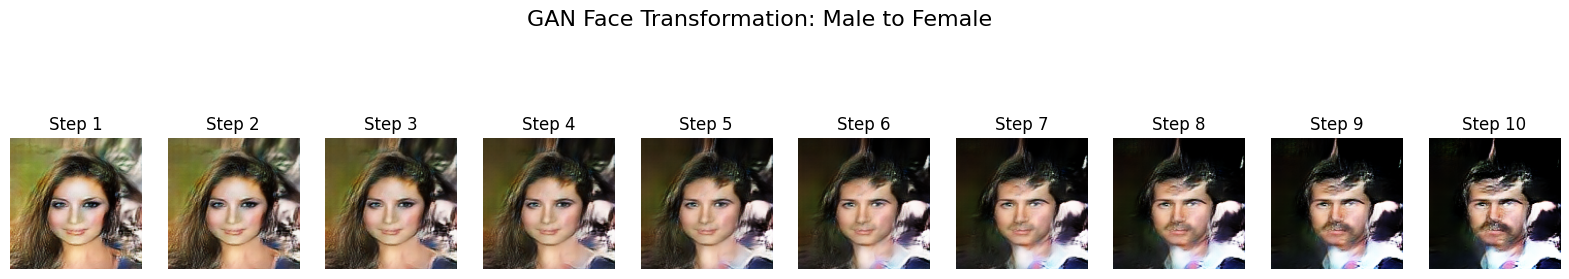

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

project_folder = '/content/drive/MyDrive/Week_2/10. Creative AI: Generating Art with Neural Style Transfer'
generator_path = os.path.join(project_folder, 'generator.h5')
gender_vector_path = os.path.join(project_folder, 'gender_vec.npy')


# Load the Generator and Gender Vector
try:
    generator = tf.keras.models.load_model(generator_path)
    print("Generator model loaded successfully.")
    # Let's print the expected input shape to confirm
    print(f"Model expects input shape: {generator.input_shape}")

    gender_vector = np.load(gender_vector_path)

    gender_vector = np.reshape(gender_vector, (1, -1)).astype('float32')
    print("Gender vector loaded and reshaped successfully.")

except Exception as e:
    print(f"Error loading files: {e}")
    print("Please double-check that the file names and paths are correct!")


#Generate the Image Variations
latent_dim = 100

base_latent_vector = tf.random.normal(shape=(1, latent_dim))

num_variations = 10
generated_images = []

strength_levels = np.linspace(-2.5, 2.5, num_variations)

print("\n Generating 10 image variations...")

for strength in strength_levels:
    modified_latent_vector = base_latent_vector + (strength * gender_vector)


    prediction = generator(modified_latent_vector, training=False)
    generated_images.append(prediction[0])

print(" Generation complete.")


# Results
print("\n Displaying the results...")

plt.figure(figsize=(20, 4))
plt.suptitle('GAN Face Transformation: Male to Female', fontsize=16)

for i, image in enumerate(generated_images):
    ax = plt.subplot(1, num_variations, i + 1)
    image_to_show = (image + 1) / 2.0
    plt.imshow(image_to_show)
    plt.title(f'Step {i+1}')
    plt.axis('off')

plt.show()

In [ ]:
import imageio
from PIL import Image
import numpy as np
from IPython.display import Image as DisplayImage, display

print("⚙️ Creating GIF...")


gif_images = []
for image_tensor in generated_images:

    image_scaled = ((image_tensor + 1) / 2.0) * 255

    image_uint8 = tf.cast(image_scaled, tf.uint8).numpy()
    gif_images.append(image_uint8)


gif_path = '/content/drive/MyDrive/21 DAYS 21 PROJECTS/10. Creative AI: Generating Art with Neural Style Transfer/face_transformation.gif'
imageio.mimsave(gif_path, gif_images + gif_images[::-1], duration=0.2, loop=0) # loop=0 means infinite loop

print(f"GIF saved successfully to: {gif_path}")

try:
    display(DisplayImage(filename=gif_path))
except FileNotFoundError:
    print(f"❌ Error: GIF file not found at {gif_path}. Please check the path.")
except Exception as e:
    print(f"❌ An error occurred while trying to display the GIF: {e}")

⚙️ Creating GIF...
GIF saved successfully to: /content/drive/MyDrive/21 DAYS 21 PROJECTS/10. Creative AI: Generating Art with Neural Style Transfer/face_transformation.gif


 Gender Classifier model loaded successfully.


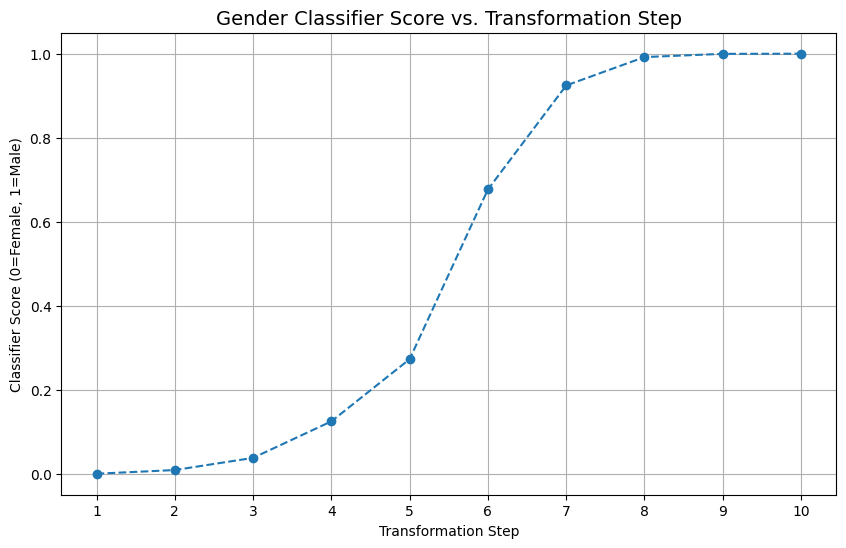

In [ ]:
classifier_path = '/content/drive/MyDrive/21 DAYS 21 PROJECTS/10. Creative AI: Generating Art with Neural Style Transfer/gender_classifier.keras'
try:
    classifier = tf.keras.models.load_model(classifier_path)
    print(" Gender Classifier model loaded successfully.")
except Exception as e:
    print(f"Error loading classifier: {e}")
    print("Please make sure you've uploaded 'gender-classifier-mobilenet.h5' to your project folder.")

# Predict Gender for Each Generated Image
gender_scores = []
for image_tensor in generated_images:

    img_resized = tf.image.resize(image_tensor, (128, 128))
    img_expanded = tf.expand_dims(img_resized, axis=0)

    # Predict and get the score (0 for Female, 1 for Male)
    score = classifier.predict(img_expanded, verbose=0)[0][0]
    gender_scores.append(score)

# Plot the Scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), gender_scores, marker='o', linestyle='--')
plt.title('Gender Classifier Score vs. Transformation Step', fontsize=14)
plt.xlabel('Transformation Step')
plt.ylabel('Classifier Score (0=Female, 1=Male)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

## Conclusion

*   This notebook demonstrates the ability to manipulate a pre-trained GAN's latent space to control a semantic attribute, in this case, gender.
*   By adding a scaled gender vector to the base latent vector, we were able to generate a sequence of images showing a smooth transition from a masculine-presenting face to a feminine-presenting face.
*   The plot of the gender classifier scores further validates this transformation.
*   The scores show a clear trend from higher values (indicating male) at the initial steps to lower values (indicating female) as the transformation progresses.
*   This confirms that the gender vector effectively steers the image generation process in the desired direction within the latent space.
*   This experiment highlights the interpretability and controllability of GANs for targeted image synthesis.